# Machine Learning - Regression example

###### Links: [House prices dataset (Kaggle)](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)  |  [Article on this use case ()]()

### 0 - Setup

###### Import pckgs

In [4]:
from ml_utils import *
import warnings
warnings.filterwarnings("ignore")

###### Import data

In [51]:
dtf = pd.read_csv("data_houses.csv")
cols = ["OverallQual","GrLivArea","GarageCars","GarageArea","TotalBsmtSF","FullBath","YearBuilt","YearRemodAdd",
        "LotFrontage","MSSubClass"]
dtf = dtf[["Id"]+cols+["SalePrice"]]
dtf.head()

,Id,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,FullBath,YearBuilt,YearRemodAdd,LotFrontage,MSSubClass,SalePrice
0,1,7,1710,2,548,856,2,2003,2003,65.0,60,208500
1,2,6,1262,2,460,1262,2,1976,1976,80.0,20,181500
2,3,7,1786,2,608,920,2,2001,2002,68.0,60,223500
3,4,7,1717,3,642,756,1,1915,1970,60.0,70,140000
4,5,8,2198,3,836,1145,2,2000,2000,84.0,60,250000


Shape: (1460, 12)
-----------------
Id --> Type:num | Nas: 0(0%) | Min-Max: 1-1460 | Possible PK
OverallQual --> Type:cat | Nas: 0(0%) | Categories: 10
GrLivArea --> Type:num | Nas: 0(0%) | Min-Max: 334-5642
GarageCars --> Type:cat | Nas: 0(0%) | Categories: 5
GarageArea --> Type:num | Nas: 0(0%) | Min-Max: 0-1418
TotalBsmtSF --> Type:num | Nas: 0(0%) | Min-Max: 0-6110
FullBath --> Type:cat | Nas: 0(0%) | Categories: 4
YearBuilt --> Type:num | Nas: 0(0%) | Min-Max: 1872-2010
YearRemodAdd --> Type:num | Nas: 0(0%) | Min-Max: 1950-2010
LotFrontage --> Type:num | Nas: 259(17%) | Min-Max: 21-313
MSSubClass --> Type:cat | Nas: 0(0%) | Categories: 15
SalePrice --> Type:num | Nas: 0(0%) | Min-Max: 34900-755000


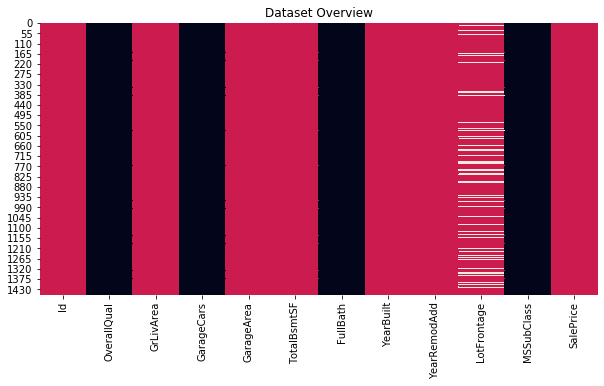

 Categerocial   Numerical   NaN 


In [52]:
dtf_overview(dtf, max_cat=20, figsize=(10,5))

### 1 - Data Analysis

###### Group variables by type
- pk: Id
- y: SalePrice
- info: OverallQual, YearBuilt, YearRemodAdd, MSSubClass
- inside: GrLivArea, FullBath
- outside: LotFrontage
- perks: GarageCars, GarageArea, TotalBsmtSF

In [53]:
dtf = dtf.set_index("Id")

In [54]:
features = []

###### Target Variable

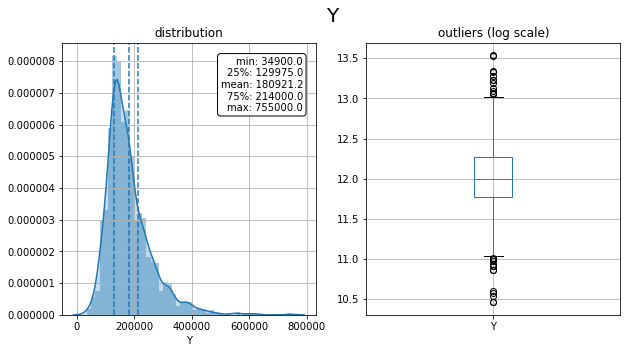

In [55]:
dtf = dtf.rename(columns={"SalePrice":"Y"})

freqdist_plot(dtf, "Y", box_logscale=True, figsize=(10,5))

In [56]:
#-> Average House price: 180,921

###### Info: OverallQual, YearBuilt, YearRemodAdd, GarageYrBlt, MSSubClass

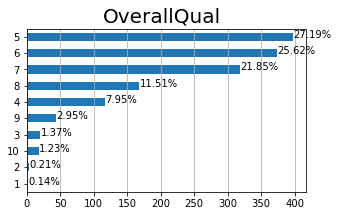

In [57]:
#--- OverallQual ---#
freqdist_plot(dtf, "OverallQual", figsize=(5,3))

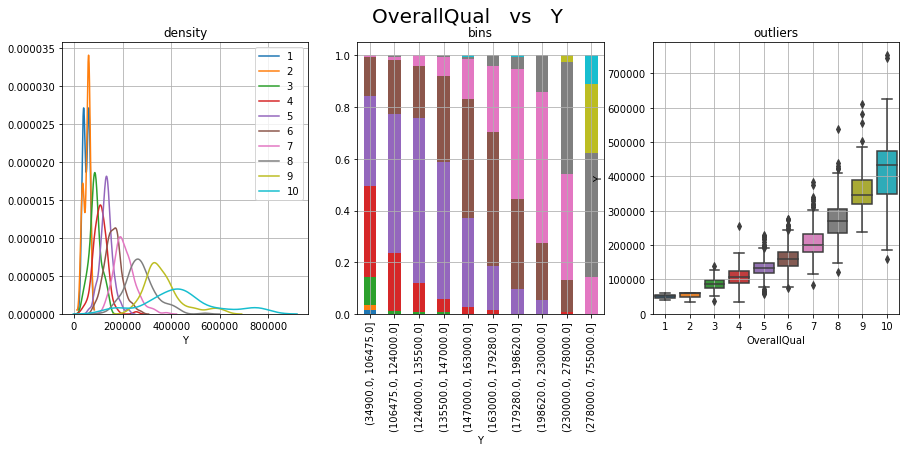

In [58]:
bivariate_plot(dtf, x="OverallQual", y="Y", figsize=(15,5))

In [59]:
#-> OverallQual is Predctive: the higher the quality the higher the price.
features.append("OverallQual")

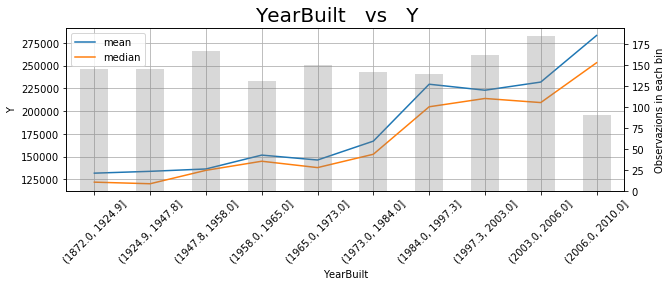

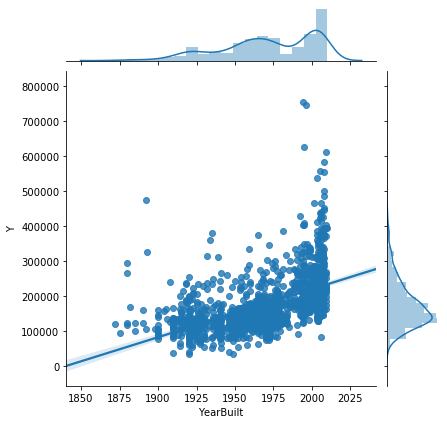

In [60]:
#--- YearBuilt ---#
bivariate_plot(dtf, x="YearBuilt", y="Y", figsize=(10,3))

In [61]:
#-> YearBuilt is Predctive: the more recent the construction the higher the price.
features.append("YearBuilt")

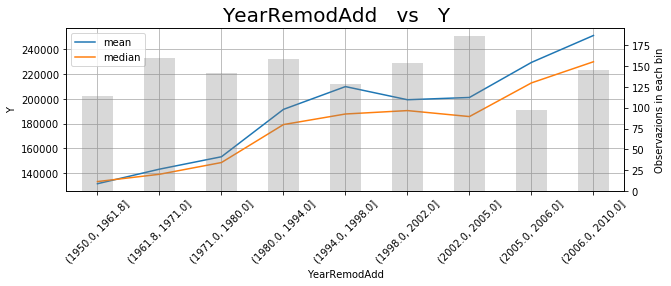

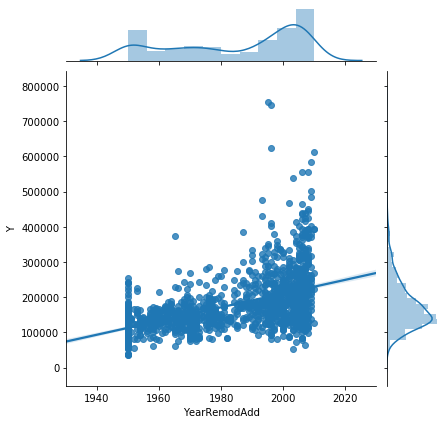

In [62]:
#--- YearRemodAdd ---#
bivariate_plot(dtf, x="YearRemodAdd", y="Y", figsize=(10,3))

In [63]:
#-> YearRemodAdd is Predctive: the more recent the renovation the higher the price.
features.append("YearRemodAdd")

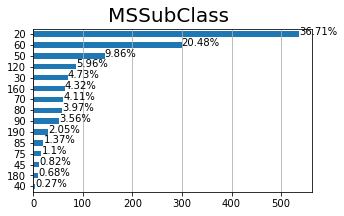

In [65]:
#--- MSSubClass ---#
freqdist_plot(dtf, "MSSubClass", figsize=(5,3))

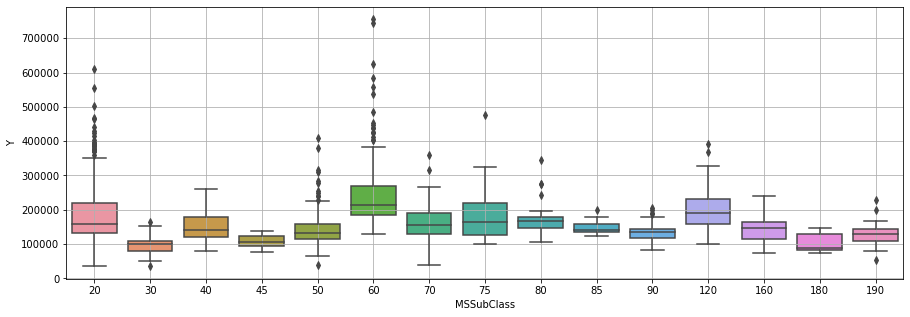

In [66]:
# this variable is tricky as it has 15 classes, so I will plot manually in one boxplot
fig, ax = plt.subplots(figsize=(15,5))
sns.catplot(x="MSSubClass", y="Y", data=dtf, kind="box", ax=ax)
ax.grid(True)
plt.close()

In [70]:
# I will summarise this categories in clusters
MSSubClass_clusters = {"min":[30,45,180], "max":[60,120], "mean":[]}
dtf = add_feature_clusters(dtf, "MSSubClass", dic_clusters_mapping=MSSubClass_clusters, dropx=False)
dtf[["MSSubClass","MSSubClass_cluster","Y"]].head()

,MSSubClass,MSSubClass_cluster,Y
Id,,,
1,60,max,208500
2,20,mean,181500
3,60,max,223500
4,70,mean,140000
5,60,max,250000


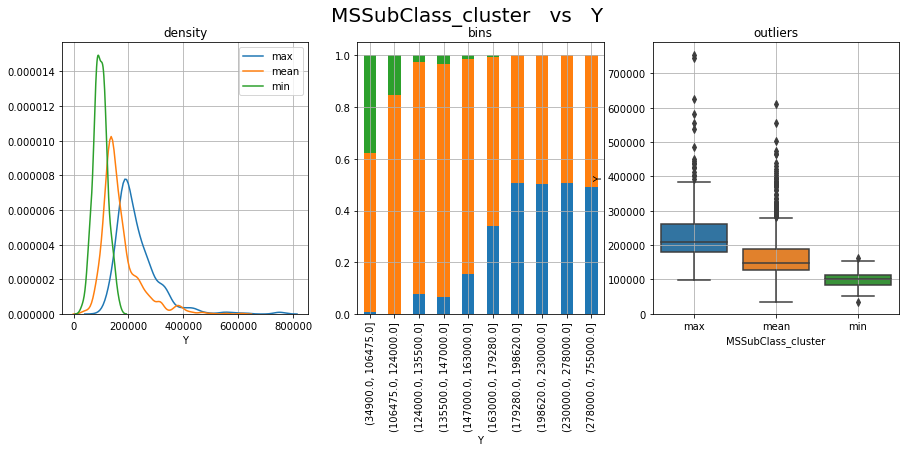

In [71]:
bivariate_plot(dtf, x="MSSubClass_cluster", y="Y", figsize=(15,5))

In [72]:
#-> MSSubClass_cluster is Predictive: different lot classes (clusters) lead to different house prices.
features.append("MSSubClass_cluster")

###### Inside: GrLivArea, FullBath, TotRmsAbvGrd

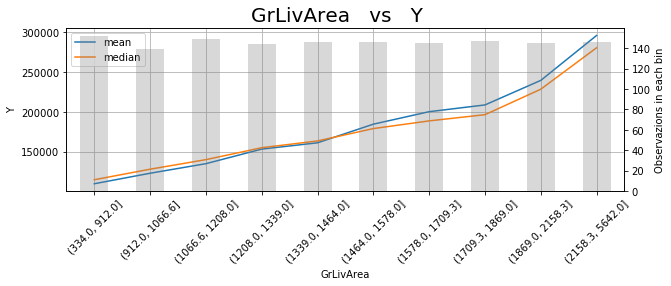

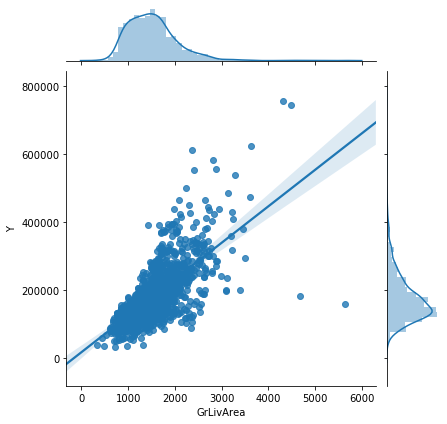

In [73]:
#--- GrLivArea ---#
bivariate_plot(dtf, x="GrLivArea", y="Y", figsize=(10,3))

In [74]:
#-> GrLivArea is Predctive: the larger the living area the higher the price.
features.append("GrLivArea")

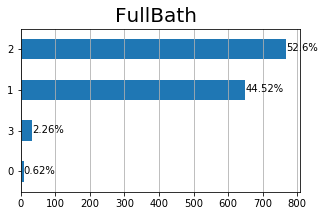

In [75]:
#--- FullBath ---#
freqdist_plot(dtf, "FullBath", figsize=(5,3))

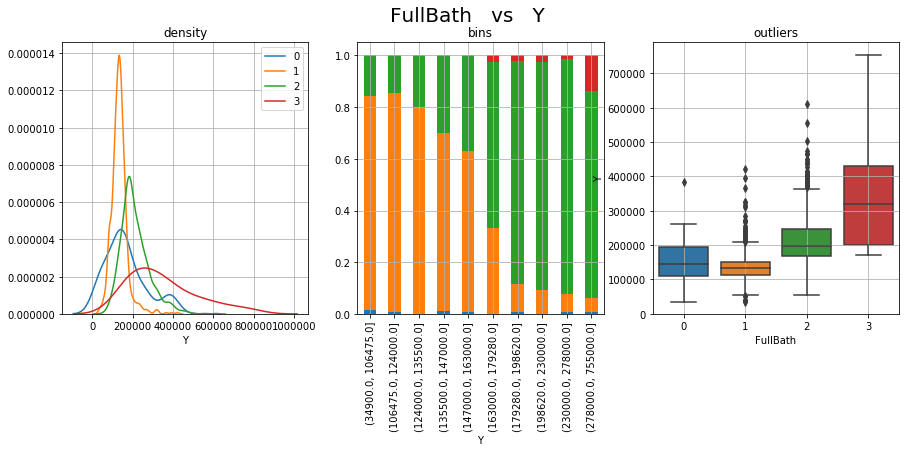

In [76]:
bivariate_plot(dtf, x="FullBath", y="Y", figsize=(15,5))

In [114]:
# I can't tell if the samples are statistically significant, I'll test that:
coeff, p = test_corr(dtf, x="FullBath", y="Y")

Anova F: the variables are Correlated (p-value: 0.0)


In [77]:
#-> FullBath is Predctive: the more bathrooms there are the higher the price.
features.append("FullBath")

###### Outside: LotFrontage

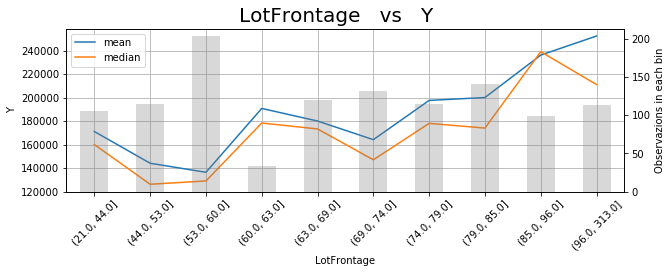

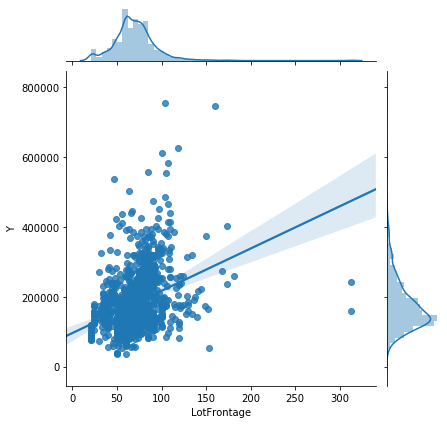

In [78]:
#--- LotFrontage ---#
bivariate_plot(dtf, x="LotFrontage", y="Y", figsize=(10,3))

In [117]:
# I can't tell if the samples are statistically significant, I'll test that:
coeff, p = test_corr(dtf, x="LotFrontage", y="Y")

Pearson Correlation: 0.352 Significant (p-value: 0.0)


In [79]:
#-> LotFrontage is Predictive: the larger is the street connected to property the higher is the house price.
features.append("LotFrontage")

###### Perks: GarageCars, GarageArea, TotalBsmtSF, Fireplaces

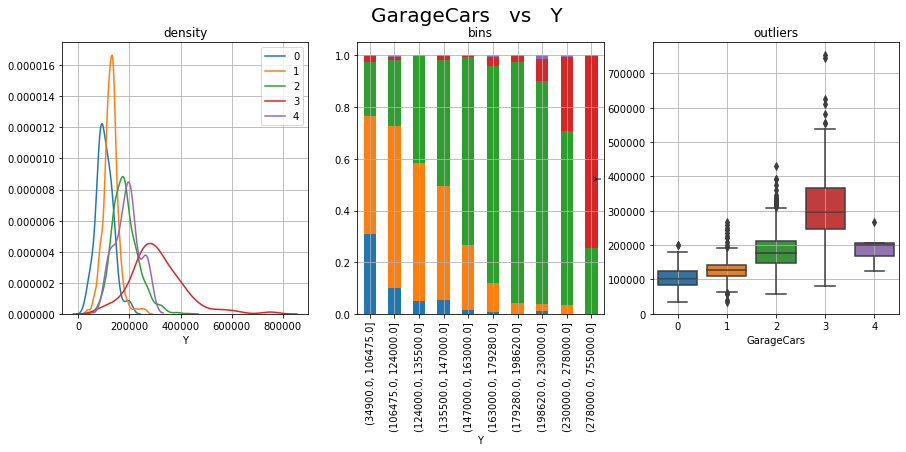

In [80]:
#--- GarageCars ---#
bivariate_plot(dtf, x="GarageCars", y="Y", figsize=(15,5))

In [81]:
#-> GarageCars is Predictive: the larger is the garage (in cars) the higher is the house price.
features.append("GarageCars")

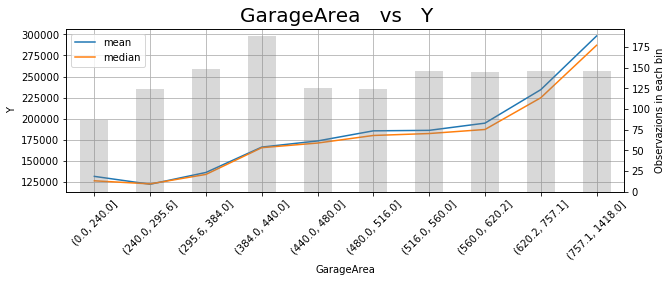

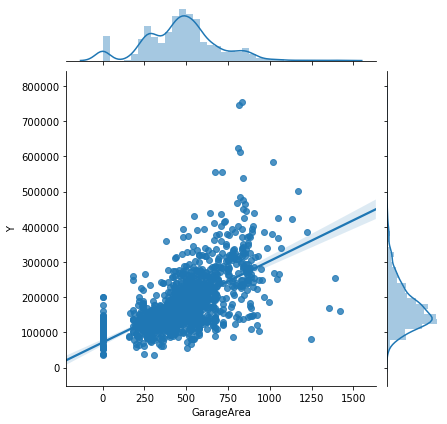

In [82]:
#--- GarageArea ---#
bivariate_plot(dtf, x="GarageArea", y="Y", figsize=(10,3))

In [83]:
#-> GarageArea is Predictive: the larger is the garage (is sqrfeet) the higher is the house price.
features.append("GarageArea")

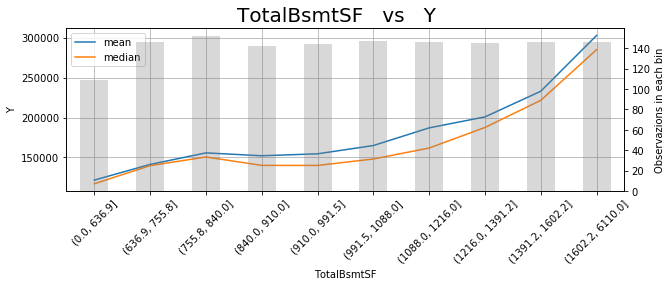

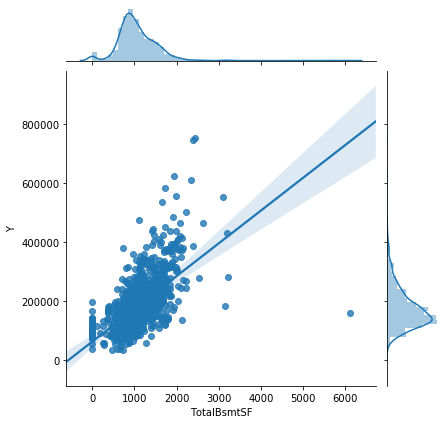

In [84]:
#--- TotalBsmtSF, ---#
bivariate_plot(dtf, x="TotalBsmtSF", y="Y", figsize=(10,3))

In [85]:
#-> TotalBsmtSF, is Predictive: the larger is the basement the higher is the house price.
features.append("TotalBsmtSF")

###### Summary

In [86]:
dtf = dtf[features+["Y"]]
dtf.head()

,OverallQual,YearBuilt,YearRemodAdd,MSSubClass_cluster,GrLivArea,FullBath,LotFrontage,GarageCars,GarageArea,TotalBsmtSF,Y
Id,,,,,,,,,,,
1,7,2003,2003,max,1710,2,65.0,2,548,856,208500
2,6,1976,1976,mean,1262,2,80.0,2,460,1262,181500
3,7,2001,2002,max,1786,2,68.0,2,608,920,223500
4,7,1915,1970,mean,1717,1,60.0,3,642,756,140000
5,8,2000,2000,max,2198,2,84.0,3,836,1145,250000


### 2 - Preprocessing

###### To do:
- Dataset partitioning
- Resample
- Treat missings
- Encode categorical data
- Scaling
- Preprocess Test data

In [89]:
check = data_preprocessing(dtf, y="Y", task="regression")

--- check missing ---
--- check categorical data ---
--- split train/test ---
   OK: step skipped
--- scaling ---
   OK: step skipped


###### Partitioning

In [90]:
dtf_train, dtf_test = dtf_partitioning(dtf, y="Y", test_size=0.3, shuffle=False)

X_train shape: (1022, 10) | X_test shape: (438, 10)
y_train mean: 181713.25 | y_test mean: 179073.06
11 features: ['OverallQual', 'YearBuilt', 'YearRemodAdd', 'MSSubClass_cluster', 'GrLivArea', 'FullBath', 'LotFrontage', 'GarageCars', 'GarageArea', 'TotalBsmtSF']


In [91]:
dtf_train.head(3)

,OverallQual,YearBuilt,YearRemodAdd,MSSubClass_cluster,GrLivArea,FullBath,LotFrontage,GarageCars,GarageArea,TotalBsmtSF,Y
Id,,,,,,,,,,,
1,7,2003,2003,max,1710,2,65.0,2,548,856,208500
2,6,1976,1976,mean,1262,2,80.0,2,460,1262,181500
3,7,2001,2002,max,1786,2,68.0,2,608,920,223500


In [92]:
dtf_test.head(3)

,OverallQual,YearBuilt,YearRemodAdd,MSSubClass_cluster,GrLivArea,FullBath,LotFrontage,GarageCars,GarageArea,TotalBsmtSF,Y
Id,,,,,,,,,,,
1023,5,1930,1950,mean,1248,1,52.0,1,160,912,87000
1024,7,2005,2006,max,1504,2,43.0,2,437,1346,191000
1025,8,1976,1976,mean,2898,2,NaN,2,665,1565,287000


###### Resample

In [93]:
# no need to resample.

###### Missing values

In [95]:
dtf_train, lotfront_mean = fill_na(dtf_train, x="LotFrontage")

--- Replacing Nas with: 69.78579881656805 ---


###### Categorical Encoding

In [96]:
dtf_train = add_dummies(dtf_train, x="MSSubClass_cluster", dropx=True)

   MSSubClass_cluster  MSSubClass_cluster_mean  MSSubClass_cluster_min
Id                                                                    
1                 max                        0                       0
2                mean                        1                       0
3                 max                        0                       0
4                mean                        1                       0
5                 max                        0                       0


In [42]:
# since the other catogories indicate all quantities, there's no need to encode them.

###### Scaling

In [97]:
scalerX = preprocessing.RobustScaler(quantile_range=(25.0, 75.0))
scalerY = preprocessing.RobustScaler(quantile_range=(25.0, 75.0))

In [98]:
dtf_train, scalerX, scalerY = scaling(dtf_train, y="Y", scalerX=scalerX, scalerY=scalerY, task="regression")

In [99]:
dtf_train.head()

,OverallQual,YearBuilt,YearRemodAdd,GrLivArea,FullBath,LotFrontage,GarageCars,GarageArea,TotalBsmtSF,MSSubClass_cluster_mean,MSSubClass_cluster_min,Y
Id,,,,,,,,,,,,
1,0.5,0.617021,0.243243,0.395177,0.0,-0.265878,0.0,0.283333,-0.293889,-1.0,0.0,0.526684
2,0.0,0.042553,-0.486486,-0.301828,0.0,0.567456,0.0,-0.083333,0.493695,0.0,0.0,0.208944
3,0.5,0.574468,0.216216,0.513419,0.0,-0.099211,0.0,0.533333,-0.169738,-1.0,0.0,0.703207
4,0.5,-1.255319,-0.648649,0.406068,-1.0,-0.543655,1.0,0.675000,-0.487876,0.0,0.0,-0.279435
5,1.0,0.553191,0.162162,1.154415,0.0,0.789678,1.0,1.483333,0.266731,-1.0,0.0,1.015063


Shape: (1022, 12)
-----------------
OverallQual --> Type:cat | Nas: 0(0%) | Categories: 10
YearBuilt --> Type:num | Nas: 0(0%) | Min-Max: -2-0
YearRemodAdd --> Type:num | Nas: 0(0%) | Min-Max: -1-0
GrLivArea --> Type:num | Nas: 0(0%) | Min-Max: -1-5
FullBath --> Type:cat | Nas: 0(0%) | Categories: 4
LotFrontage --> Type:num | Nas: 0(0%) | Min-Max: -2-13
GarageCars --> Type:cat | Nas: 0(0%) | Categories: 5
GarageArea --> Type:num | Nas: 0(0%) | Min-Max: -2-3
TotalBsmtSF --> Type:num | Nas: 0(0%) | Min-Max: -1-4
MSSubClass_cluster_mean --> Type:cat | Nas: 0(0%) | Categories: 2
MSSubClass_cluster_min --> Type:cat | Nas: 0(0%) | Categories: 2
Y --> Type:num | Nas: 0(0%) | Min-Max: -1-6


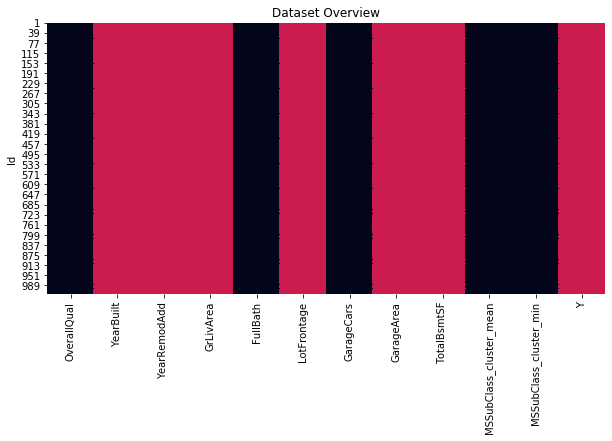

 Categerocial   Numerical   NaN 


In [100]:
dtf_overview(dtf_train)

###### Preprocess Test data

In [101]:
## Na
dtf_test = fill_na(dtf_test, x="LotFrontage", value=lotfront_mean)

--- Replacing Nas with: 69.78579881656805 ---


In [102]:
## Categorical
dtf_test = add_dummies(dtf_test, x="MSSubClass_cluster", dropx=True)

     MSSubClass_cluster  MSSubClass_cluster_mean  MSSubClass_cluster_min
Id                                                                      
1023               mean                        1                       0
1024                max                        0                       0
1025               mean                        1                       0
1026               mean                        1                       0
1027               mean                        1                       0


In [103]:
dtf_test = dtf_test[dtf_train.columns]
dtf_test.head()

,OverallQual,YearBuilt,YearRemodAdd,GrLivArea,FullBath,LotFrontage,GarageCars,GarageArea,TotalBsmtSF,MSSubClass_cluster_mean,MSSubClass_cluster_min,Y
Id,,,,,,,,,,,,
1023,5,1930,1950,1248,1,52.000000,1,160,912,1,0,87000
1024,7,2005,2006,1504,2,43.000000,2,437,1346,0,0,191000
1025,8,1976,1976,2898,2,69.785799,2,665,1565,1,0,287000
1026,5,1972,1972,882,1,70.000000,2,461,882,1,0,112500
1027,5,1960,1960,1264,1,73.000000,2,461,1268,1,0,167500


In [104]:
## Scale
dtf_test, _, _ = scaling(dtf_test, y="Y", scalerX=scalerX, scalerY=scalerY, fitted=True, task="regression")

Shape: (438, 12)
-----------------
OverallQual --> Type:cat | Nas: 0(0%) | Categories: 9
YearBuilt --> Type:num | Nas: 0(0%) | Min-Max: -2-0
YearRemodAdd --> Type:num | Nas: 0(0%) | Min-Max: -1-0
GrLivArea --> Type:num | Nas: 0(0%) | Min-Max: -1-6
FullBath --> Type:cat | Nas: 0(0%) | Categories: 4
LotFrontage --> Type:num | Nas: 0(0%) | Min-Max: -2-13
GarageCars --> Type:cat | Nas: 0(0%) | Categories: 5
GarageArea --> Type:num | Nas: 0(0%) | Min-Max: -2-3
TotalBsmtSF --> Type:num | Nas: 0(0%) | Min-Max: -1-9
MSSubClass_cluster_mean --> Type:cat | Nas: 0(0%) | Categories: 2
MSSubClass_cluster_min --> Type:cat | Nas: 0(0%) | Categories: 2
Y --> Type:num | Nas: 0(0%) | Min-Max: 52500-745000


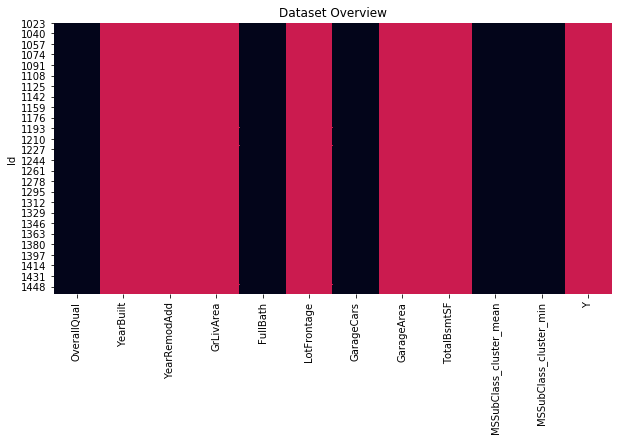

 Categerocial   Numerical   NaN 


In [105]:
dtf_overview(dtf_test)

### 3 - Baseline (linear regression)

###### Plan:
- Feature Selection: by correlation, by p-value, by importance
- Model Design
- Train / Test
- Evaluate
- Visualize model
- Explainability

###### Features Selection

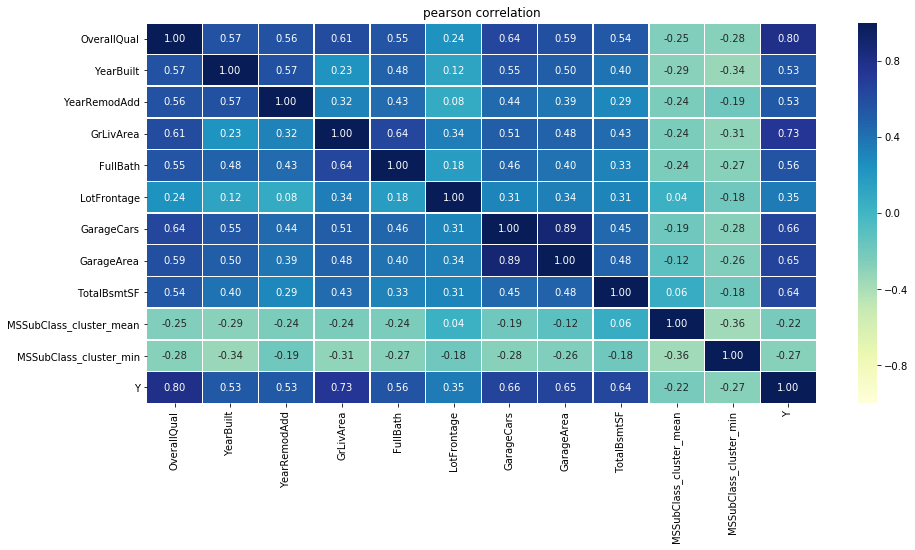

In [106]:
#--- correlation ---#
corr = corrmatrix_plot(dtf_train, method="pearson", annotation=True, figsize=(15,7))

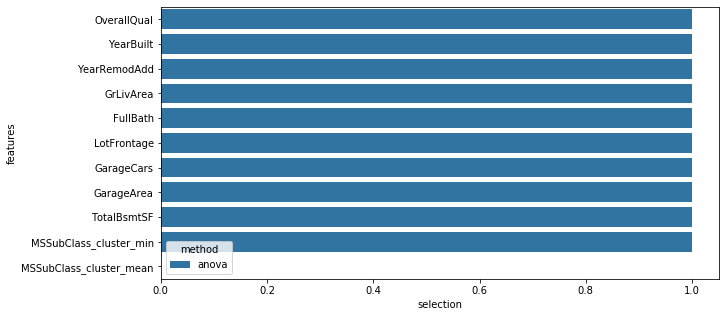

In [107]:
#--- p values ---#
dic_feat_sel = features_selection(dtf_train, y="Y", task="regression", top=10, figsize=(10,5))

--- model used ---
RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)


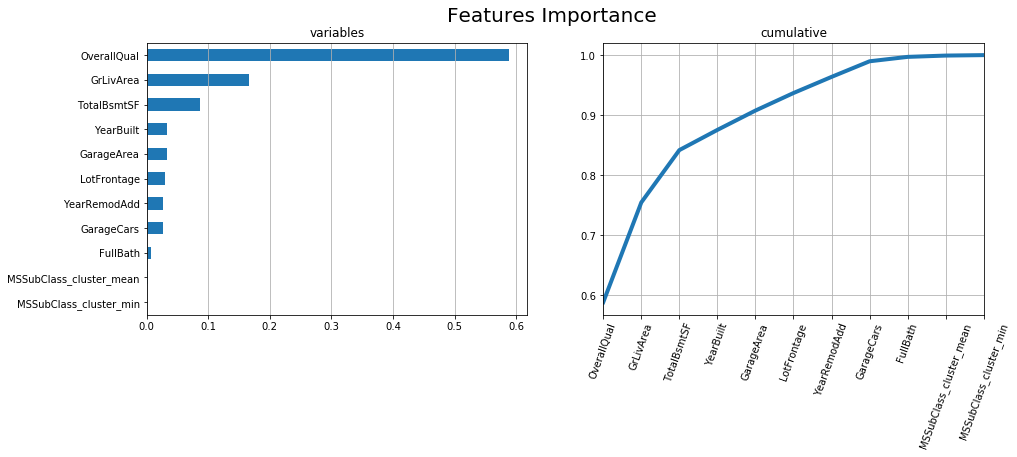

In [108]:
#--- importance ---#
model = ensemble.RandomForestRegressor(n_estimators=100, criterion="mse", random_state=0)

feat_imp = features_importance(X=dtf_train.drop("Y",axis=1).values, y=dtf_train["Y"].values, 
                               X_names=dtf_train.drop("Y",axis=1).columns.tolist(), 
                               model=model, task="regression", figsize=(15,5))

In [55]:
# -> selection
X_names = ['OverallQual', 'GrLivArea', 'TotalBsmtSF', "YearBuilt"]

###### Model Design

In [56]:
X_train = dtf_train[X_names].values
y_train = dtf_train["Y"].values

In [57]:
model = linear_model.LinearRegression()

In [58]:
def tune_regr_model(X_train, y_train, model=None, cv=10, figsize=(10,5)):
    model = linear_model.LinearRegression() if model is None else model
    r2s = []
    cv = model_selection.KFold(n_splits=cv, shuffle=True)
    fig = plt.figure(figsize=figsize)
    
    i = 1
    for train, test in cv.split(X_train, y_train):
        print(train.shape, test.shape)
        prediction = model.fit(X_train[train], y_train[train]).predict(X_train[test])
        r2 = metrics.r2_score(y_train[test], prediction)
        r2s.append(r2)
        plt.plot(prediction, y_train[train], lw=2, alpha=0.3, label='Fold %d (R2 = %0.2f)' % (i, r2))
        i = i+1
        
    plt.plot([0,1], [0,1], linestyle='--', lw=2, color='black')
    mean_tpr = np.mean(tprs, axis=0)
    mean_auc = metrics.auc(mean_fpr, mean_tpr)
    plt.plot(mean_fpr, mean_tpr, color='blue', label=r'Mean ROC (AUC = %0.2f )' % (mean_auc), lw=2, alpha=1)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('K-FOLD VALIDATION')
    plt.legend(loc="lower right")
    plt.show()
    
    scorer = metrics.make_scorer(metrics.mean_absolute_error, greater_is_better=False)
    kf = model_selection.KFold(cv, shuffle=True).get_n_splits(X_train)
    mae = -model_selection.cross_val_score(model, X_train, y_train, scoring ="neg_mean_absolute_error", cv=kf)
    return model

In [59]:
#tune_regr_model(X_train, y_train, model, cv=10, figsize=(10,5))

###### Train / Test

In [60]:
X_test = dtf_test[X_names].values
y_test = dtf_test["Y"].values

In [61]:
model, predicted = fit_regr_model(model, X_train, y_train, X_test, scalerY)

###### Evaluate

R2 (explained variance): 0.67
Mean Absolute Perc Error (|y-pred|/y): 0.56
Mean Absolute Error (|y-pred|): 26,297
Root Mean Squared Error (sqrt((y-pred)^2)): 45,228
Max Error: 578,418


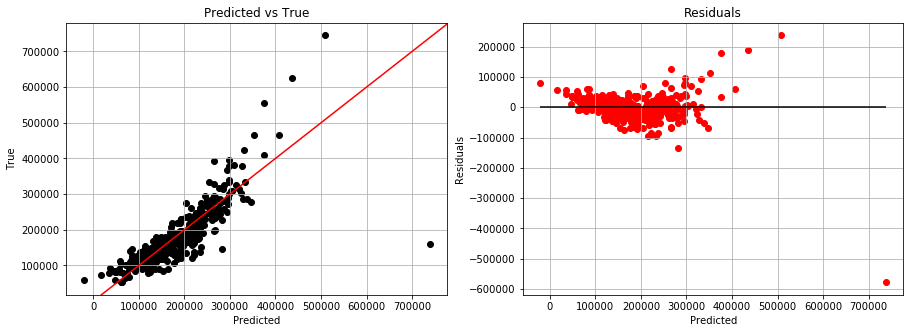

In [62]:
evaluate_regr_model(y_test, predicted, figsize=(15,5))

###### Visualize model

In [63]:
model2d = linear_model.LinearRegression()
model2d.set_params(**model.get_params())

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

--- unsupervised: pca ---
--- fitting 2d model ---
1022/1022 [==============================] - 0s 61us/sample - loss: 0.6226 - mean_absolute_error: 0.6226
--- plotting test set ---


<IPython.core.display.Javascript object>


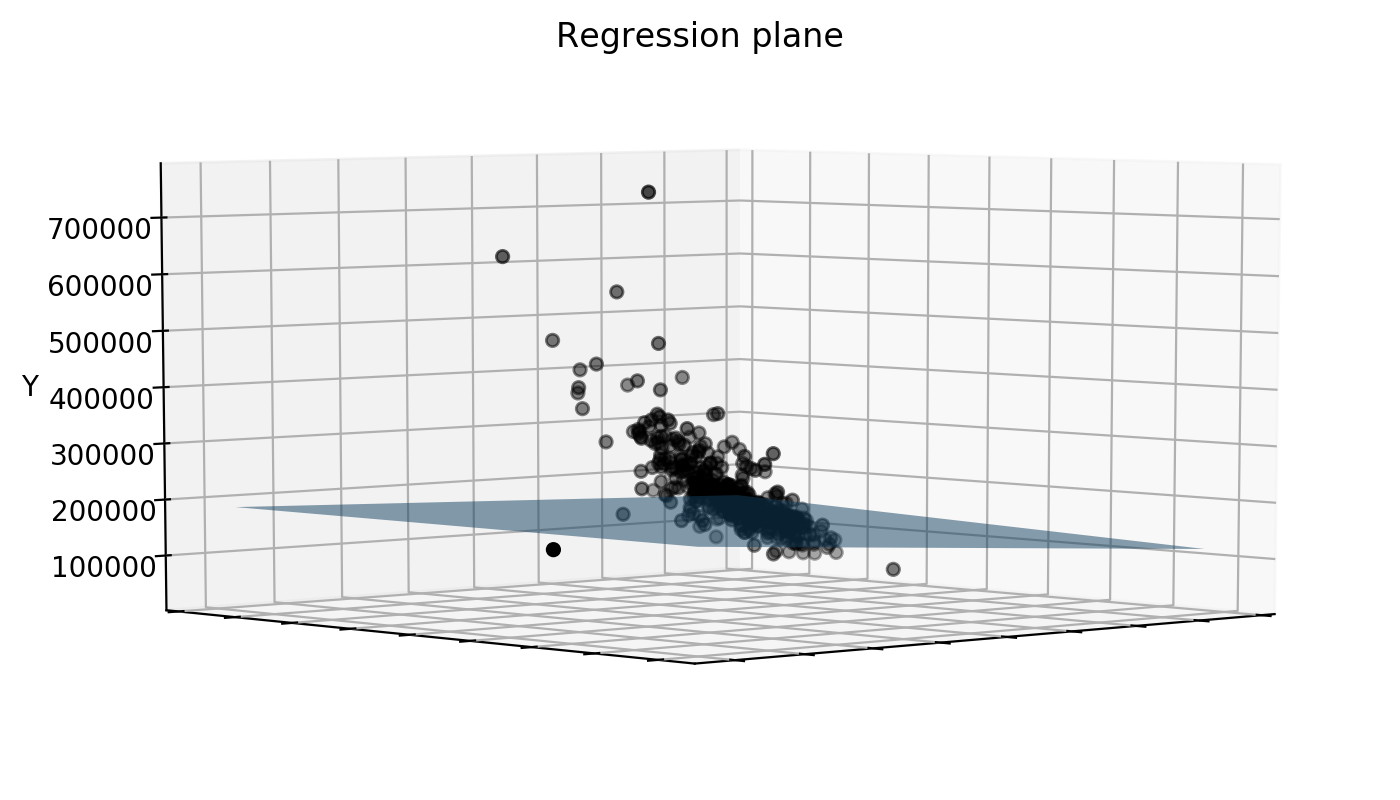

In [80]:
#%matplotlib notebook
plot3d_regr_model(X_train, y_train, X_test, y_test, scalerY, model2d, rotate=(30,0), figsize=(10,5))

###### Explainability

True: 191000 --> Pred: [224901.64094713]


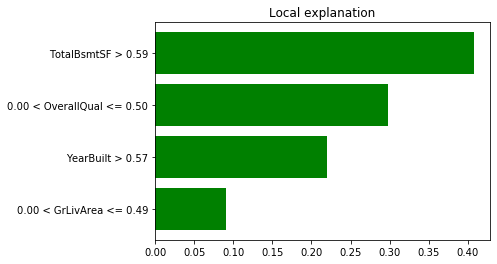

In [65]:
i = 1
print("True:", y_test[i], "--> Pred:", predicted[i])

exp = explainer(X_train, X_names, model, y_train,  X_test_instance=X_test[i], top=10, task="regression")

### 4 - Model Desing & Testing (neural network)

###### Plan:
- Model Design
- Train / Test
- Evaluate
- Visualize model

###### Model Design

In [109]:
X_train = dtf_train.drop("Y", axis=1).values
y_train = dtf_train["Y"].values

X_train.shape

(1022, 11)

In [110]:
## define R2 metrics for Keras
from tensorflow.keras import backend as K
def R2(y, y_hat):
    ss_res =  K.sum(K.square(y - y_hat)) 
    ss_tot = K.sum(K.square(y - K.mean(y))) 
    return ( 1 - ss_res/(ss_tot + K.epsilon()) )

In [111]:
model = models.Sequential()
### layer 1
model.add(layers.Dense(input_dim=11, units=int(round((11+1)/2)), kernel_initializer='normal', activation='relu'))
model.add(layers.Dropout(rate=0.2))
### layer 2
model.add(layers.Dense(units=int(round((11+1)/2)), kernel_initializer='normal', activation='relu'))
model.add(layers.Dropout(rate=0.2))
### layer output
model.add(layers.Dense(units=1, kernel_initializer='normal', activation='linear'))
model.compile(optimizer='adam', loss='mean_absolute_error', metrics=[R2])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


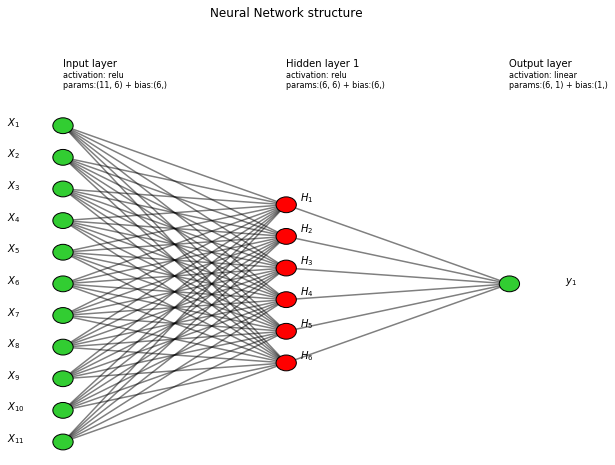

In [112]:
visualize_ann(model, titles=True, figsize=(10,8))

###### Train / Test

In [113]:
X_test = dtf_test.drop("Y", axis=1).values
y_test = dtf_test["Y"].values

X_test.shape

(438, 11)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 6)                 78        
_________________________________________________________________
dropout_4 (Dropout)          (None, 6)                 0         
_________________________________________________________________
dense_7 (Dense)              (None, 6)                 42        
_________________________________________________________________
dropout_5 (Dropout)          (None, 6)                 0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 7         
Total params: 127
Trainable params: 127
Non-trainable params: 0
_________________________________________________________________
None
Instructions for updating:
Use tf.cast instead.


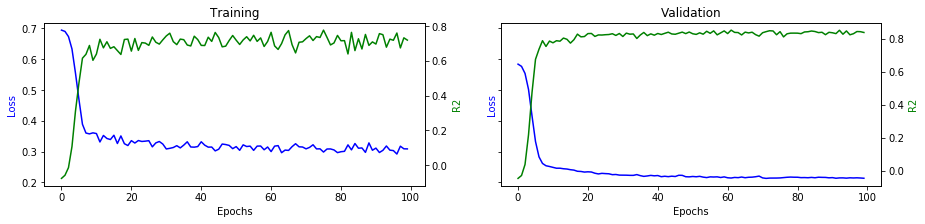

In [74]:
model, predicted = fit_ann_regr(X_train, y_train, X_test, scalerY, model, batch_size=32, epochs=100)

###### Evaluate

R2 (explained variance): 0.69
Mean Absolute Perc Error (|y-pred|/y): 0.41
Mean Absolute Error (|y-pred|): 21,307
Root Mean Squared Error (sqrt((y-pred)^2)): 43,702
Max Error: 633,334


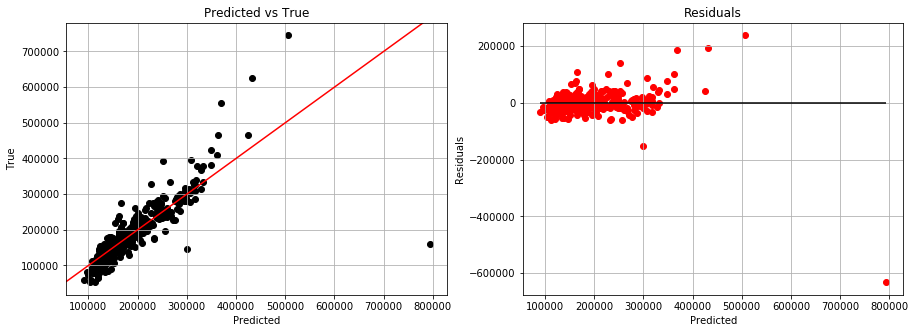

In [75]:
evaluate_regr_model(y_test, predicted, figsize=(15,5))

###### Visualize model

In [76]:
model2d = models.Sequential()
### layer 1
model2d.add(layers.Dense(input_dim=2, units=int(round((11+1)/2)), kernel_initializer='normal', activation='relu'))
model2d.add(layers.Dropout(rate=0.2))
### layer 2
model2d.add(layers.Dense(units=int(round((11+1)/2)), kernel_initializer='normal', activation='relu'))
model2d.add(layers.Dropout(rate=0.2))
### layer output
model2d.add(layers.Dense(units=1, kernel_initializer='normal', activation='linear'))
model2d.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mean_absolute_error'])

--- unsupervised: pca ---
--- fitting 2d model ---
1022/1022 [==============================] - 0s 50us/sample - loss: 0.5051 - mean_absolute_error: 0.5051
--- plotting test set ---


<IPython.core.display.Javascript object>


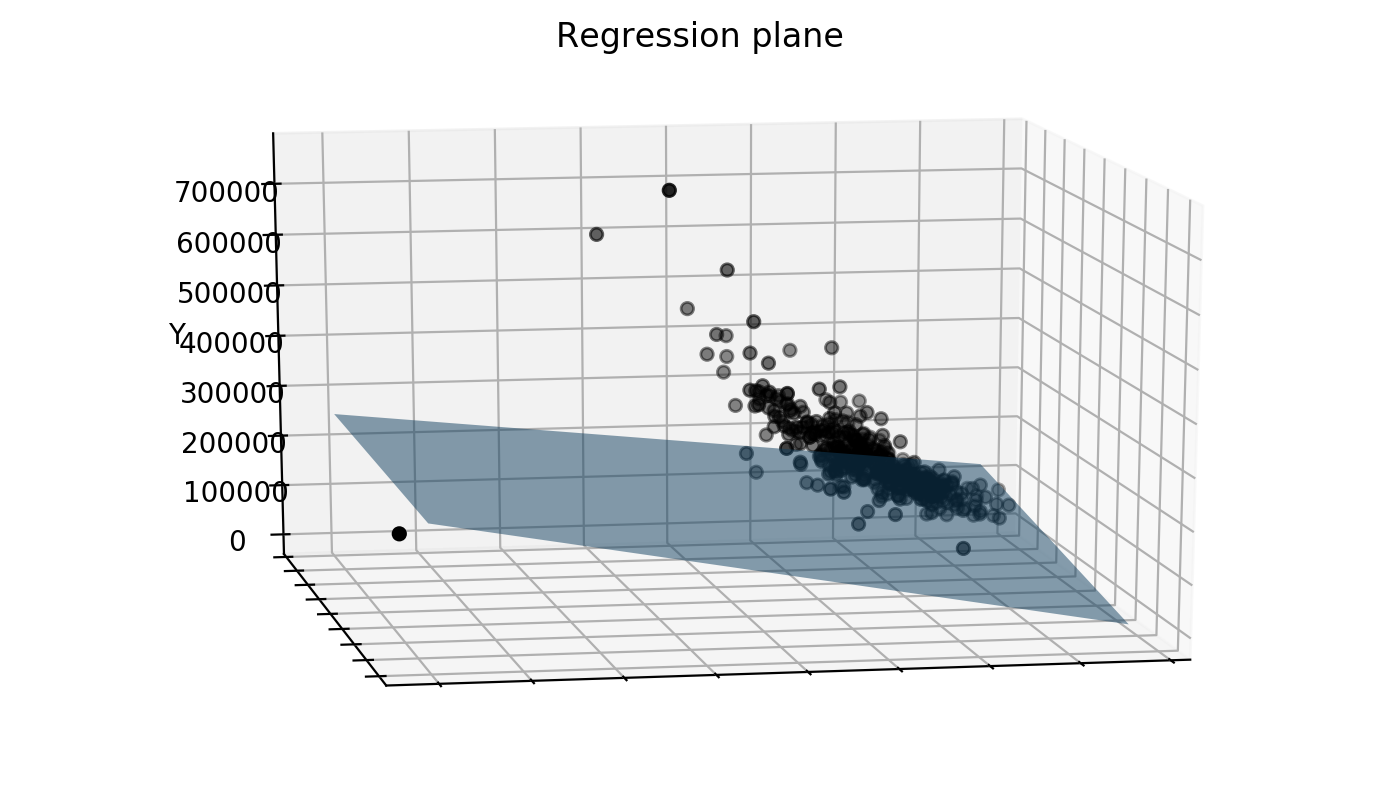

In [82]:
#%matplotlib notebook
plot3d_regr_model(X_train, y_train, X_test, y_test, scalerY, model2d, rotate=(30,0), figsize=(10,5))